### XGBoost

In [1]:
import pandas as pd

# Read in the data
folder_path = 'C:\\Users\\aoife\Documents\\Project\\filtered_data\\'

save_path = 'C:\\Users\\aoife\Documents\\Project\\'

# Read in merged file
df = pd.read_csv(folder_path + 'activity_and_survey_data.csv', usecols=['participantId', 'bodyMass_kg', 'height_m', 'bmi', 'mean_hr/s', 'hr_duration_(s)', 'max_hr', 'min_hr', 'totalSteps', 'stepsTotalDuration', 'totalDistance', 'dwrTotalDuration', 'ssq_score', 'alcohol_consumption', 'basic_expenses', 'caffeine', 'daily_activities', 'daily_smoking', 'education', 'flexible_work_hours', 'gender', 'good_life', 'hispanic','income', 'marital', 'race', 'smoking_status', 'menopause', 'recent_births', 'current_pregnant', 'work_schedule', 'alarm_dependency', 'driving_sleepy', 'falling_asleep', 'morning_person', 'nap_duration', 'sleep_lost', 'sleep_needed', 'sleep_partner', 'sleep_time_workday', 'sleep_time_weekend', 'wake_up_choices', 'wake_ups', 'weekly_naps', 'noise_light', 'stress_thinking', 'other_person', 'pain_discomfort', 'nightmares', 'bathroom_urges', 'other_reasons'])

print(df.head(5))

                          participantId  bodyMass_kg  height_m        bmi  \
0  00a55fb5-da33-4e2e-ae61-28f589fcc174       51.256    1.5748  20.667783   
1  00fd4039-9b5e-4bbb-8295-4983a3f58371       59.874    1.6510  21.965653   
2  02d5125e-684f-4166-a3b7-5df1bcfc1661       59.874    1.7018  20.673844   
3  080292d4-a0b0-4dd7-a7dd-191c8ac71664       77.111    1.8034  23.710036   
4  080bacc1-4661-4735-acca-7d27ad1a4192       90.718    1.8034  27.893906   

   mean_hr/s  hr_duration_(s)  max_hr  min_hr  totalSteps  stepsTotalDuration  \
0   1.438426             47.0   1.783   1.017      4454.0              6366.0   
1   1.290195             41.0   1.517   1.150        61.0              1441.0   
2   1.107266             64.0   1.783   0.617     10790.0             20098.0   
3   1.056040            176.0   1.967   0.850      3819.0              7895.0   
4   1.179194             72.0   1.883   0.900     12734.0             14412.0   

   ...  wake_up_choices  wake_ups  weekly_naps  no

In [2]:
# X - features

X = df[['bodyMass_kg','height_m','bmi','mean_hr/s','hr_duration_(s)','max_hr','min_hr','totalSteps','stepsTotalDuration','totalDistance','dwrTotalDuration', 'alcohol_consumption', 'basic_expenses', 'caffeine', 'daily_activities', 'daily_smoking', 'education', 'flexible_work_hours', 'gender', 'good_life', 'hispanic','income', 'marital', 'race', 'smoking_status', 'menopause', 'recent_births', 'current_pregnant', 'work_schedule', 'alarm_dependency', 'driving_sleepy', 'falling_asleep', 'morning_person', 'nap_duration', 'sleep_lost', 'sleep_needed', 'sleep_partner', 'sleep_time_workday', 'sleep_time_weekend', 'wake_up_choices', 'wake_ups', 'weekly_naps', 'noise_light', 'stress_thinking', 'other_person', 'pain_discomfort', 'nightmares', 'bathroom_urges', 'other_reasons']].values

# y - target
y = df['ssq_score'].values

groups = df['participantId'].values

In [3]:
# Train test split

from sklearn.model_selection import GroupKFold

gkf = GroupKFold(n_splits=10)

train_predictions = []
train_actual = []
test_predictions = []
test_actual = []

train_rmse_scores = []
test_rmse_scores = []


In [5]:
import xgboost as xg
from sklearn.metrics import mean_squared_error
import numpy as np

for i, (train_index, test_index) in enumerate(gkf.split(X, y, groups)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    print(f"Fold {i}:")
    # print(f"  Train: index={train_index}, group={groups[train_index]}")
    #print(f"  Test:  index={test_index}, group={groups[test_index]}")
    print(f"Test: index={test_index}\n")
    print(f"Train: index={train_index}\n")

    # Convert train and test to DMatrix
    dtrain = xg.DMatrix(data=X_train, label=y_train)
    #print(dtrain.get_data())
    dtest = xg.DMatrix(data=X_test, label=y_test)
    test_data = dtest.get_data()
    print(dtest.get_label())


    # Set parameters
    parameters = {'booster':'gbtree', 'objective':'reg:squarederror', 'seed':42}
    
    # train the model
    model = xg.train(params=parameters, dtrain=dtrain)

    train_predictions.extend(model.predict(dtrain))
    train_actual.extend(y_train)
    train_rmse = mean_squared_error(train_actual, train_predictions, squared=False)
    print(f"Train RMSE: {train_rmse}")

    train_rmse_scores.append(train_rmse)

    test_predictions.extend(model.predict(dtest))
    test_actual.extend(y_test)
    test_rmse = mean_squared_error(test_actual, test_predictions, squared=False)

    test_rmse_scores.append(test_rmse)

    print(f"Test RMSE: {test_rmse}")

avg_train_rmse = np.mean(train_rmse_scores)
avg_test_rmse = np.mean(test_rmse_scores)

print(f"Average Train RMSE: {avg_train_rmse}")
print(f"Average Test RMSE: {avg_test_rmse}")

Fold 0:
Test: index=[433 434 435 436 437 438 439 440 441 442 443 444 445 446 447 448 449 450
 451 452 453 454 455 456 457 458 459 460 461 462 463 464 465 466 467 468
 469 470 471 472 473 474 475 476 477 478 479 480 481 482 483 484 485 486
 487 488 489 490 491 492 493 494 495 496 497 498 499 500 501 502 503 504
 505 506 507 508 509 510 511 512 513 514 515 516 517 518 519 520 521 522
 523 524 525 526 527 528 529 530 531 532 533 534 535 536 537 538 539 540
 541 542 543 544 545 546 547 548 549 550 551 552 553 554 555 556 557 558
 559 560 561 562 563 564 565 566 567 568 569 570 571 572 573 574 575 576
 577 578 579 580 581]

Train: index=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88

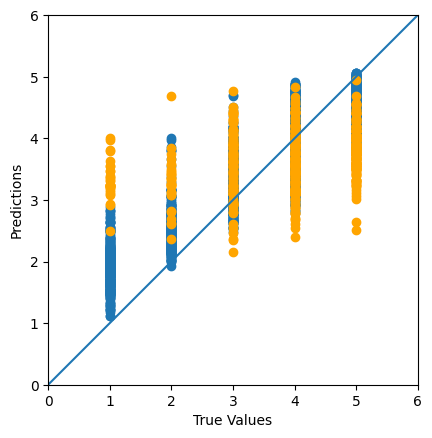

In [6]:
# Plot predictions vs actual

import matplotlib.pyplot as plt


plt.scatter(train_actual, train_predictions, label='Train')
plt.scatter(test_actual, test_predictions, label='Test', color='orange')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,6])
plt.ylim([0,6])
_ = plt.plot([-100, 100], [-100, 100])
plt.legend
plt.show()


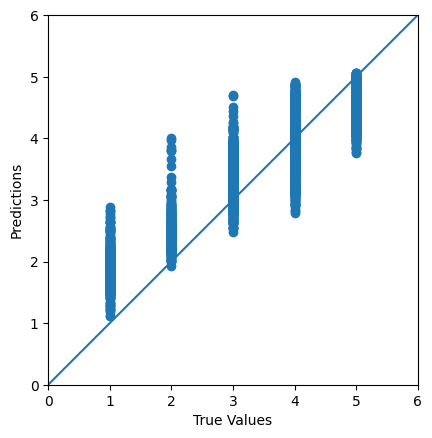

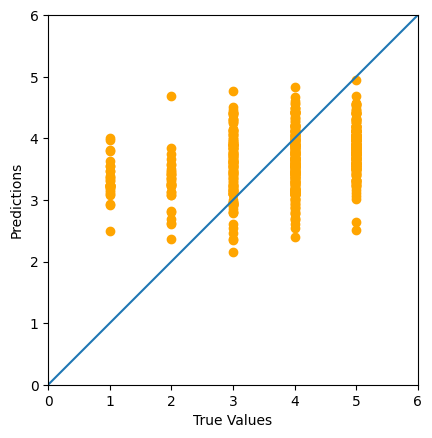

In [7]:
# Plot predictions vs actual

import matplotlib.pyplot as plt

plt.scatter(train_actual, train_predictions, label='Train')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,6])
plt.ylim([0,6])
_ = plt.plot([-100, 100], [-100, 100])
plt.legend
plt.show()

# Plot predictions vs actual

import matplotlib.pyplot as plt

plt.scatter(test_actual, test_predictions, label='Test', color='orange')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,6])
plt.ylim([0,6])
_ = plt.plot([-100, 100], [-100, 100])
plt.legend
plt.show()

Find out results for each datapoint